## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
sns.set(style="darkgrid")

## Loading dataset and preprocessing

In [5]:
train_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\train.csv", error_bad_lines=False)
test_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\test.csv", error_bad_lines=False)
val_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\val.csv", error_bad_lines=False)

C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\2695908610.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\train.csv", error_bad_lines=False)
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\2695908610.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\test.csv", error_bad_lines=False)
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\2695908610.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  val_df = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Predictive model for Social media\val.csv", error_bad_lines=False)


In [6]:
train_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tr_df = train_df.dropna()

In [8]:
tr_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [9]:
tr_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,3.0,22.0,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,4.0,28.0,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,5.0,33.0,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [10]:
test_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [11]:
te_df = test_df.dropna()

In [12]:
te_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [13]:
val_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,31.0,Male,Instagram,170.0,5.0,80.0,20.0,35.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,877.0,32.0,Female,Instagram,155.0,6.0,75.0,25.0,38.0,Happiness
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
va_df = val_df.dropna()

In [15]:
va_df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

## Exploratory data analysis

#### Age distribution

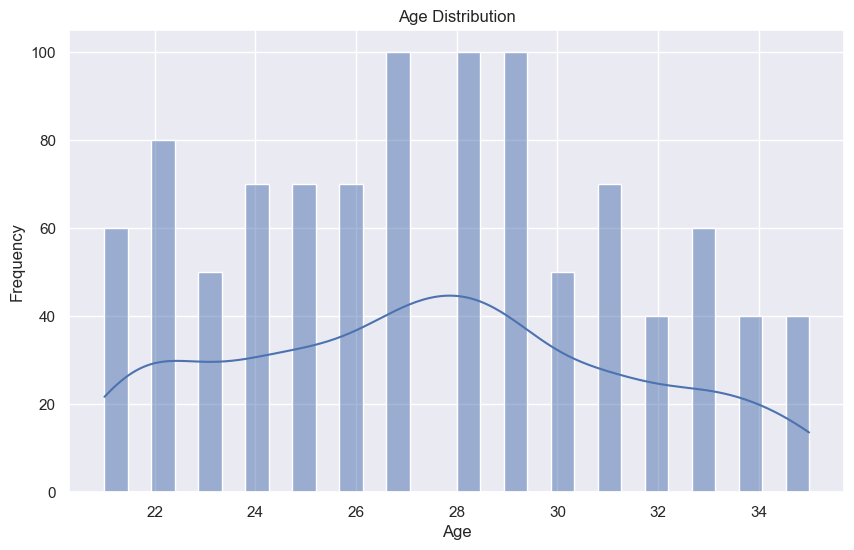

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Gender distribution

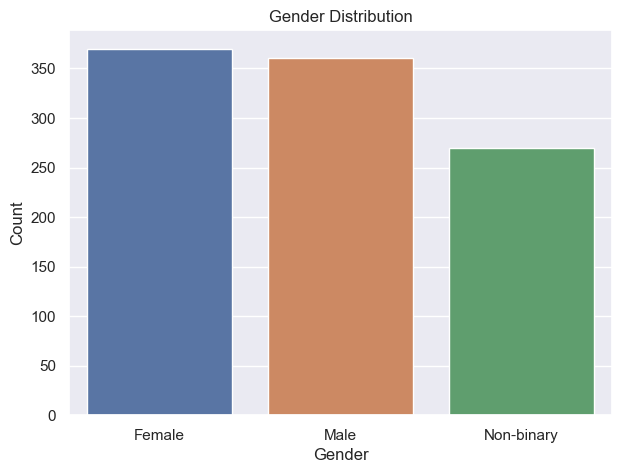

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Dailyusage time by platforms

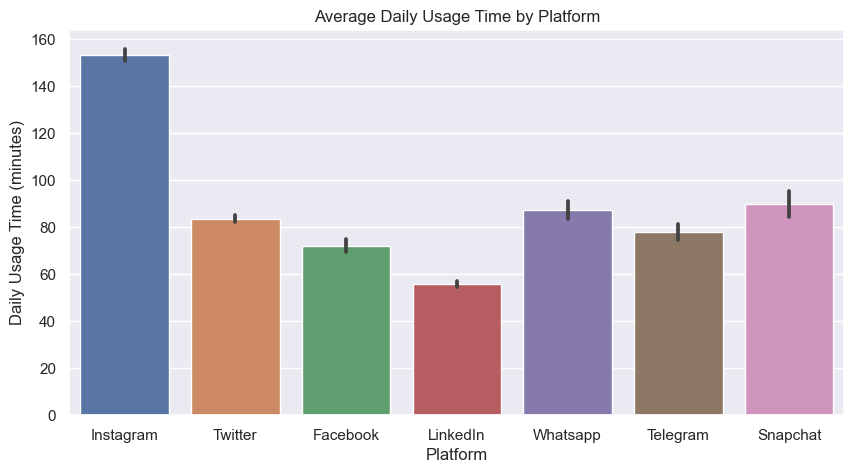

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

#### Dominant emotion distribution

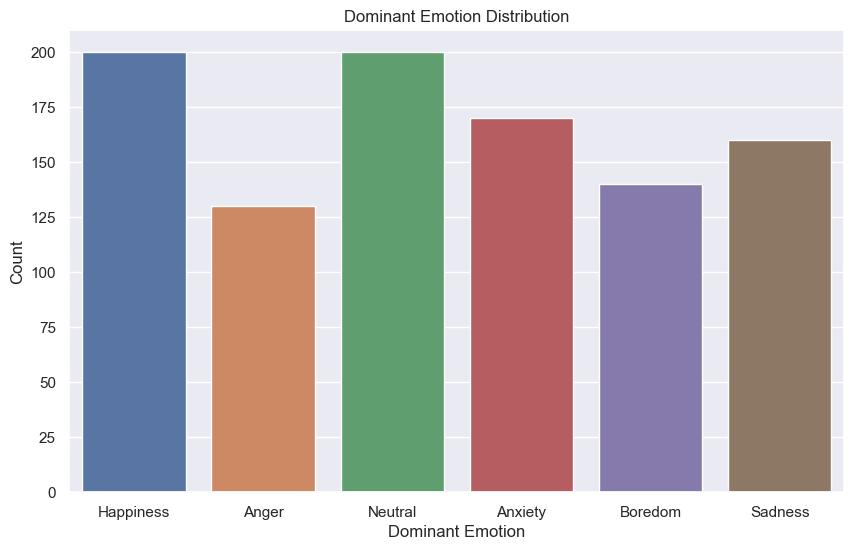

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train_df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

#### post vs likes

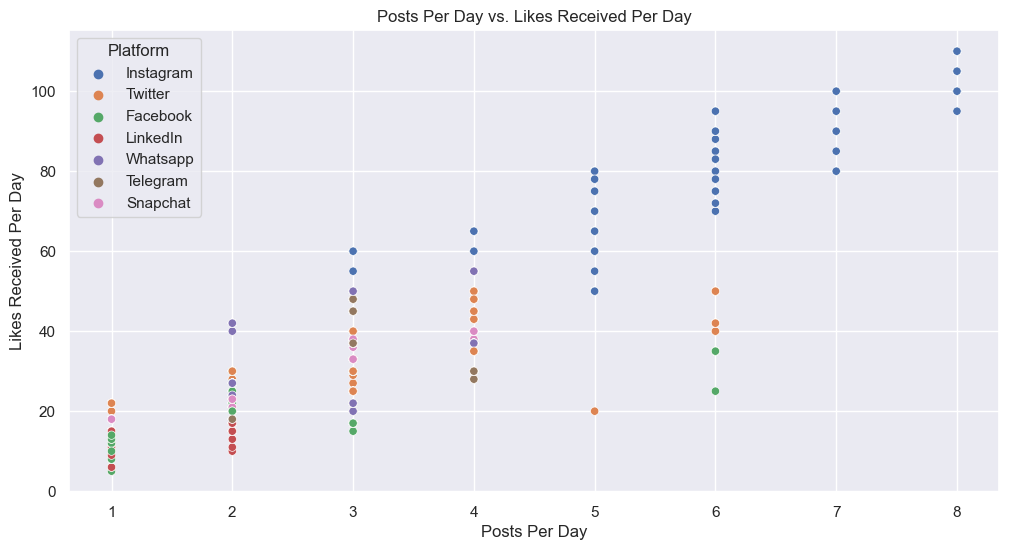

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Posts_Per_Day', y='Likes_Received_Per_Day', hue='Platform', data=tr_df)
plt.title('Posts Per Day vs. Likes Received Per Day')
plt.xlabel('Posts Per Day')
plt.ylabel('Likes Received Per Day')
plt.show()

#### Daily Usage time by gender

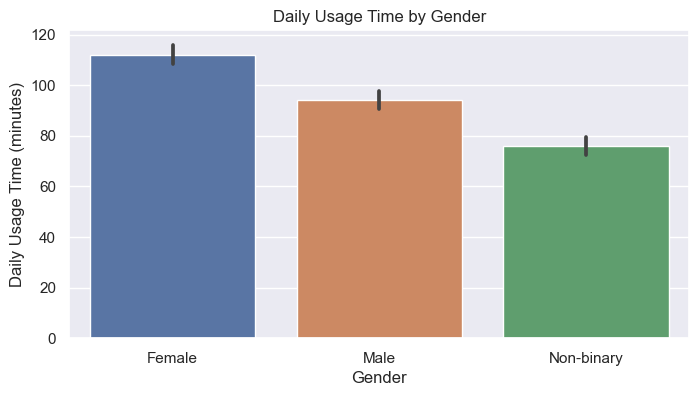

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Gender', y='Daily_Usage_Time (minutes)', data=tr_df)
plt.title('Daily Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

#### Avg engagement per platform

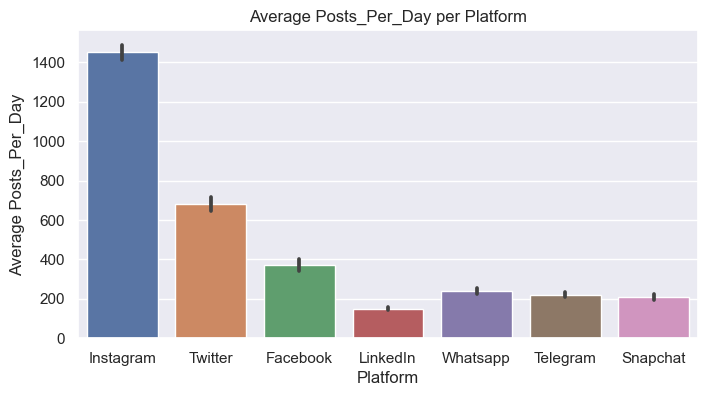

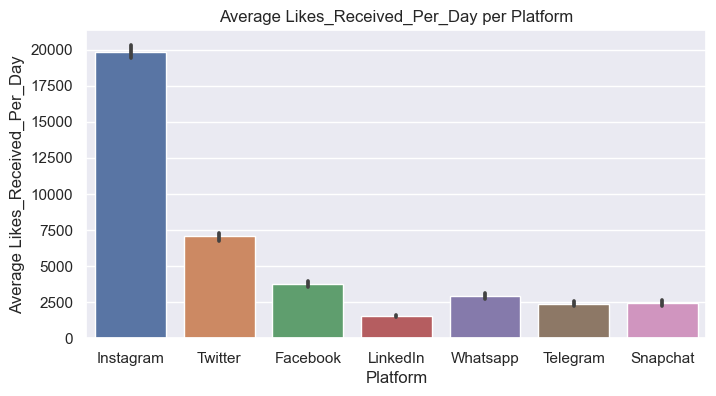

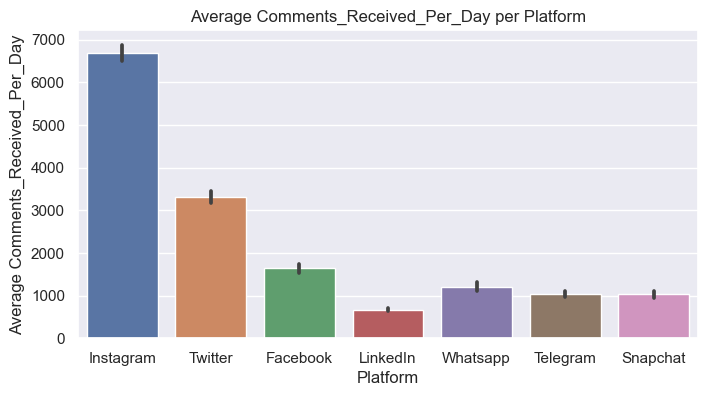

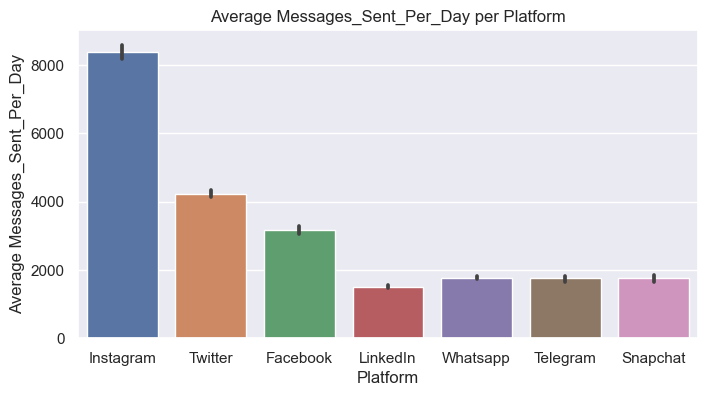

In [22]:
engagement_metrics = ['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
for metric in engagement_metrics:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Platform', y=metric, data=tr_df, estimator=sum)
    plt.title(f'Average {metric} per Platform')
    plt.xlabel('Platform')
    plt.ylabel(f'Average {metric}')
    plt.show()

#### Emotion distribution by platform

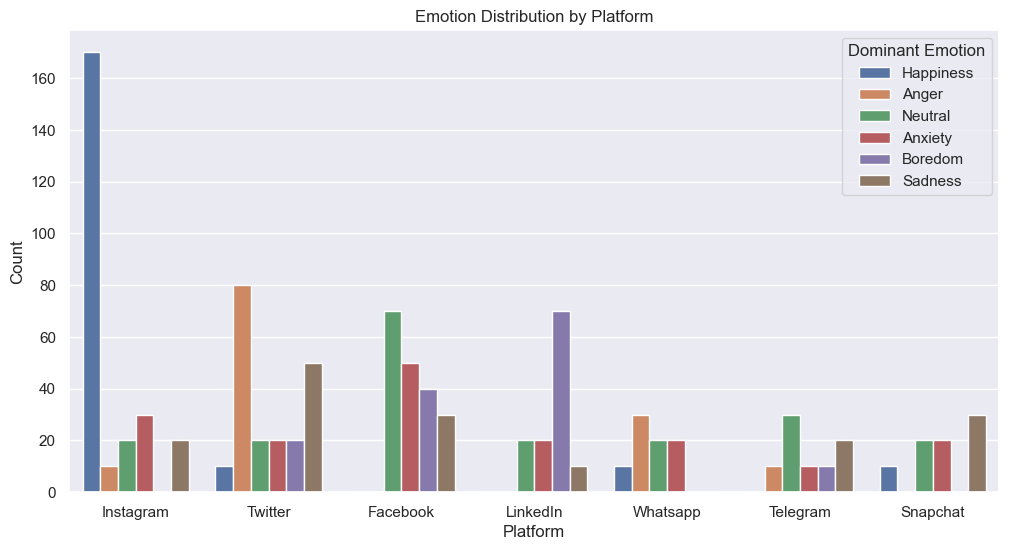

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Dominant_Emotion', data=tr_df)
plt.title('Emotion Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Dominant Emotion')
plt.show()

#### Age vs Engagement metrics

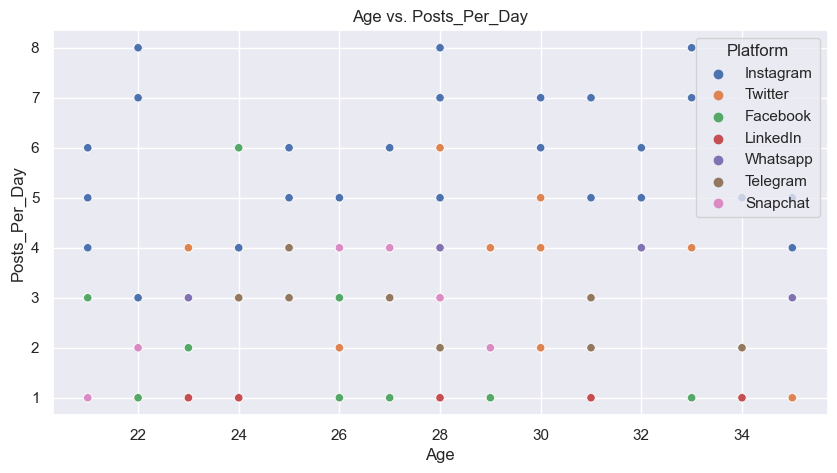

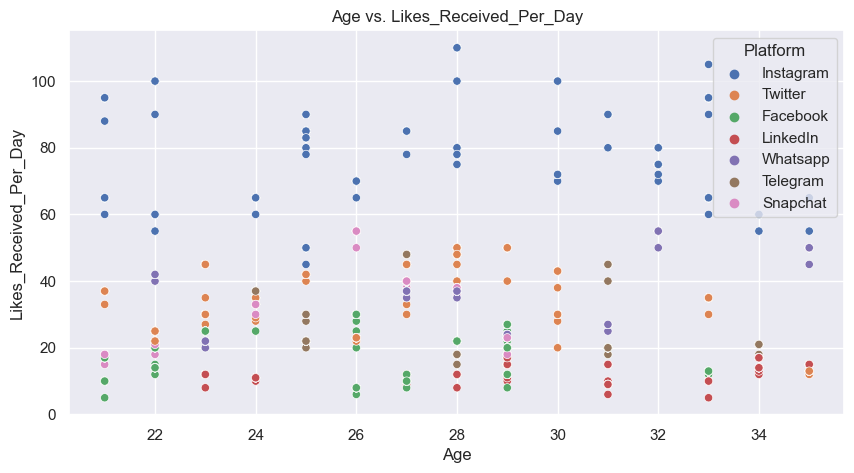

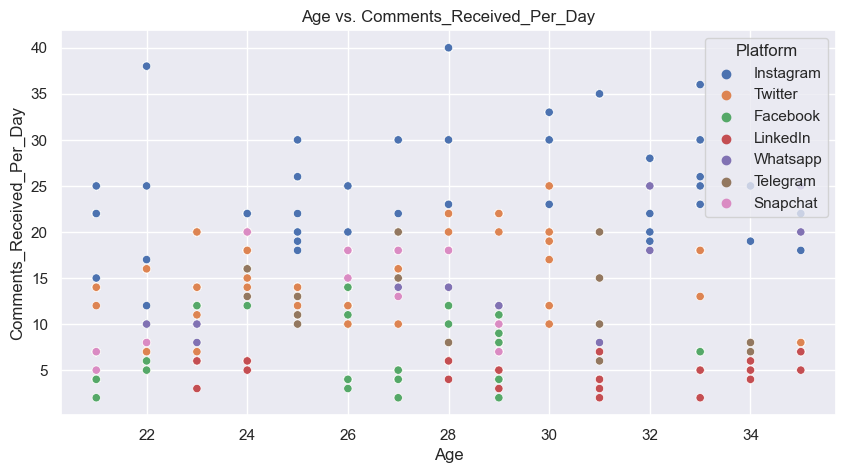

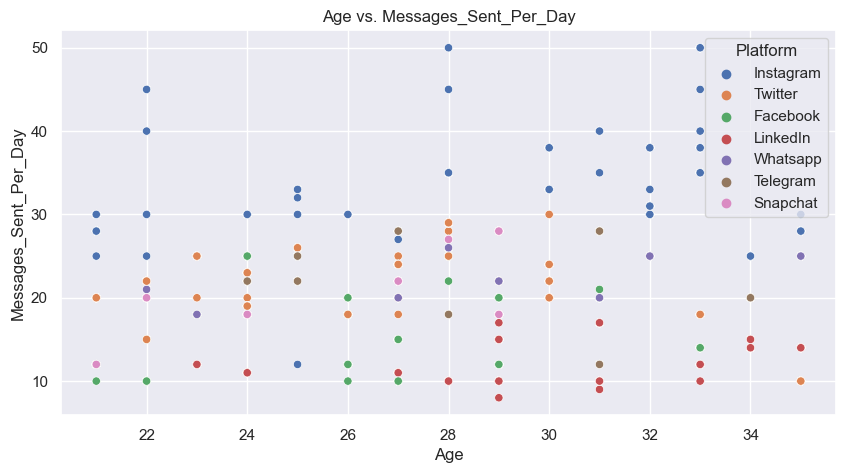

In [24]:
for metric in engagement_metrics:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Age', y=metric, hue='Platform', data=tr_df)
    plt.title(f'Age vs. {metric}')
    plt.xlabel('Age')
    plt.ylabel(metric)
    plt.show()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

#### Encoding

In [26]:
label_encoder = LabelEncoder()
for column in ['Gender', 'Platform', 'Dominant_Emotion']:
    tr_df[column] = label_encoder.fit_transform(tr_df[column])

C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\1485046850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df[column] = label_encoder.fit_transform(tr_df[column])
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\1485046850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df[column] = label_encoder.fit_transform(tr_df[column])
C:\Users\Ksnes\AppData\Local\Temp\ipykernel_12572\1485046850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

#### Train test split

In [27]:
X = tr_df.drop(columns=['Dominant_Emotion'])
y = tr_df['Dominant_Emotion']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standerdising

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#### Training the model

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Predictions and evoluation

In [32]:
y_pred = rf_model.predict(X_val)
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred))
print('Random Forest Accuracy:', accuracy_score(y_val, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.95      0.97        39
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        35
           4       0.98      1.00      0.99        42
           5       1.00      1.00      1.00        24

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Random Forest Accuracy: 0.99


#### Confusion matrix

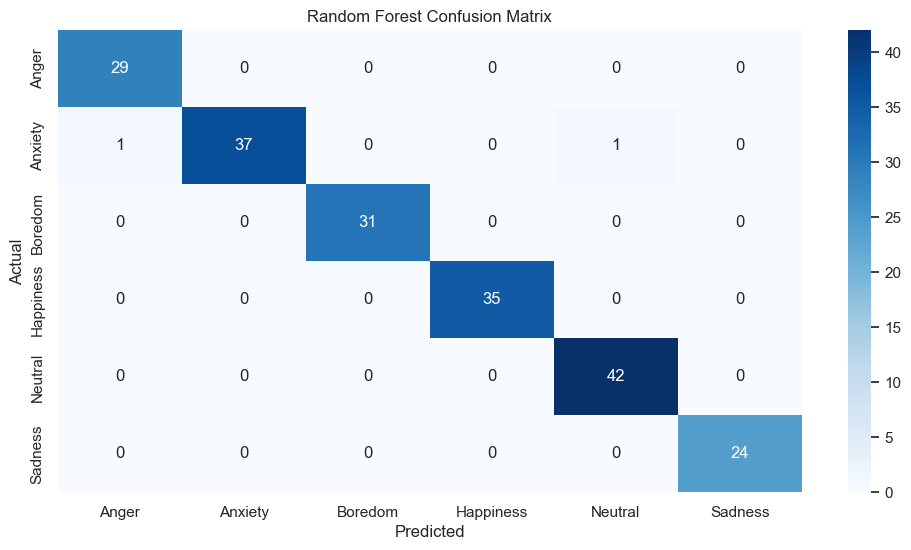

In [37]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### Feature Importance

In [34]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

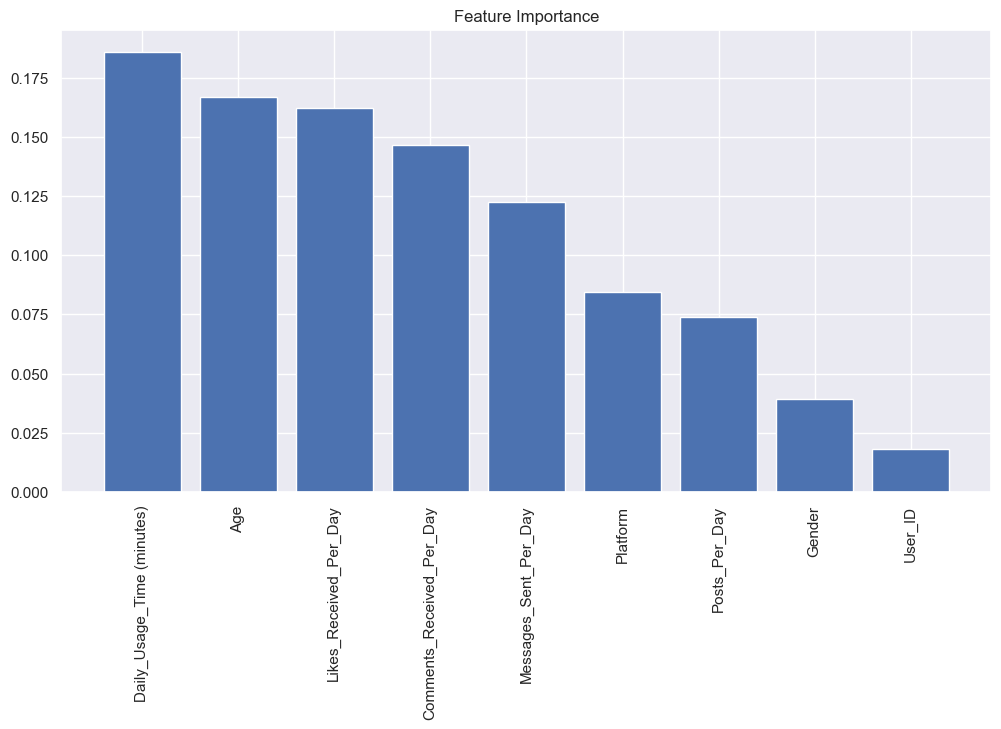

In [35]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()